# Coarsen in Two Dimensions

We describe the coarsening algorithm implemented in `coarsen.m` for two dimensional bisection grids. We assume when bisecting a triangle, the left child is stored in a prori of the right child. More details can be found in the paper,

- L. Chen and C-S. Zhang. [A coarsening algorithm on adaptive grids by newest vertex bisection and its applications](http://math.uci.edu/~chenlong/CZ2007.html). *Journal of Computational Mathematics*, 28(6):767-789, 2010.

## Compatible Bisection
Every bisection grids can be obtained from an initial grid with a
sequence of compatible bisections. In two dimensions, there are two types
of compatible bisections.

- Case 1: A pair of triangles are divided into four triangles by adding the middle point their common edge.

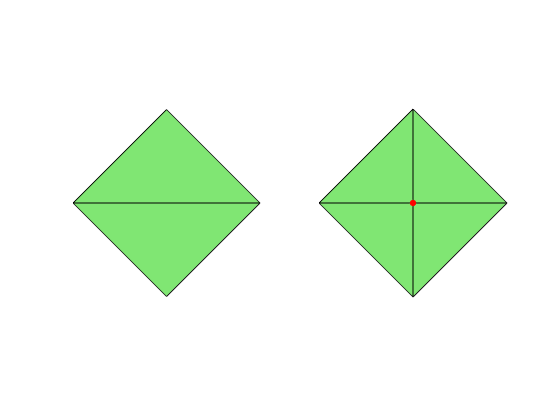

In [1]:
node = [1,0; 0,1; -1,0; 0,-1];
elem = [2 3 1; 4 1 3];
figure(1); 
subplot(1,2,1); showmesh(node,elem);
[node,elem] = bisect(node,elem,[1 2]);
subplot(1,2,2); showmesh(node,elem); 
findnode(node,5,'noindex');

- Case 2: A triangle containing a boundary edge is divided into two triangles by adding the middle point the boundary edge.

The nodes added by compatible bisections are called good-to-carsen nodes
or simpley *good* nodes.

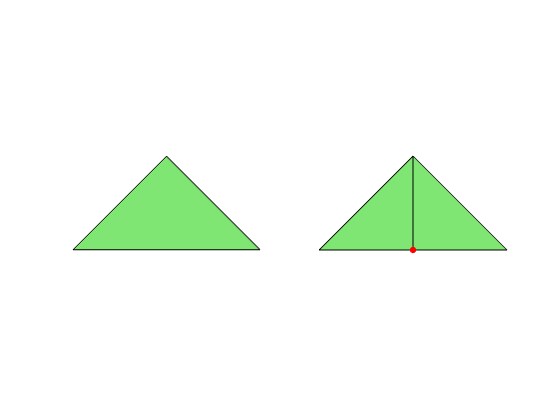

In [4]:
elem = [2 3 1];
subplot(1,2,1); showmesh(node,elem);
[node,elem] = bisect(node,elem,1);
subplot(1,2,2); showmesh(node,elem); 
findnode(node,5,'noindex');

## Coarsening Procedure

Our coarsening algorithm consists of finding good nodes and removing
them. The coarsening procedure is illustrated by the following figures.

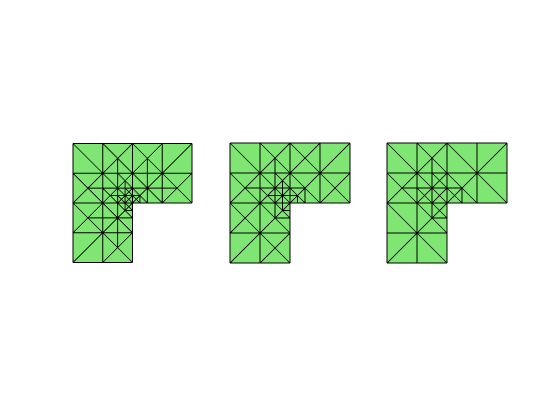

In [12]:
load Lshapemesh
figure
for k = 1:3
    subplot(1,3,k); showmesh(node,elem);
    [node,elem] = coarsen(node,elem,'all');
end

## Step 1 -- Find Good Nodes
We use the following characterization to find a good node p

- The valence of p is 4 (interior node) or 2 (boundary node).
- It is the newest vertex of all triangles in its nodal star.

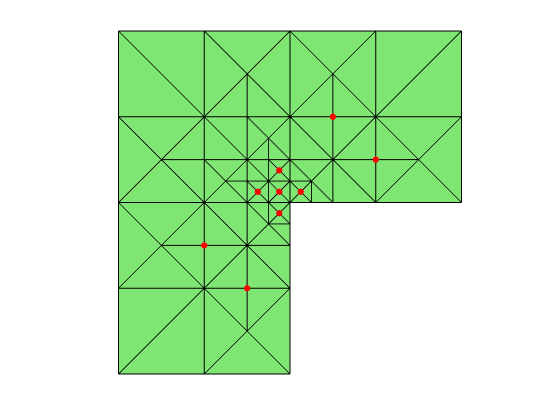

In [15]:
load Lshapemesh
N = size(node,1); 
NT = size(elem,1);
valence = accumarray(elem(:),ones(3*NT,1),[N 1]);
valenceNew = accumarray(elem(:,1),ones(NT,1), [N 1]); % for newest vertex only
allNodes = (1:N)';
intGoodNode = allNodes((valence==valenceNew) & (valence==4));
bdGoodNode = allNodes((valence==valenceNew) & (valence==2));
figure(2); showmesh(node,elem);
findnode(node,intGoodNode,'noindex');
findnode(node,bdGoodNode,'noindex');

## Step 2 -- Remove Good Nodes

The star of good nodes are found using the incides matrix between
triangles and vertices.

In [16]:
t2v = sparse([1:NT,1:NT,1:NT], elem(1:NT,:), 1, NT, N);
[ii,jj] = find(t2v(:,intGoodNode));
nodeStar = reshape(ii,4,length(intGoodNode));

For interior good nodes, there are 3 configurations of 4 triangles in the
star of a good node showing the following figures. Other combinations are
ruled out by our ordering assumption: the left child is stored in a prori
of the right child. Therefe `nodeStar(:,1)` is always in L type and
`nodeStar(:,4)` is in R type. Here the oritentation is respect the
direction from the new added vertex to the opposite vertex in each
triangle.

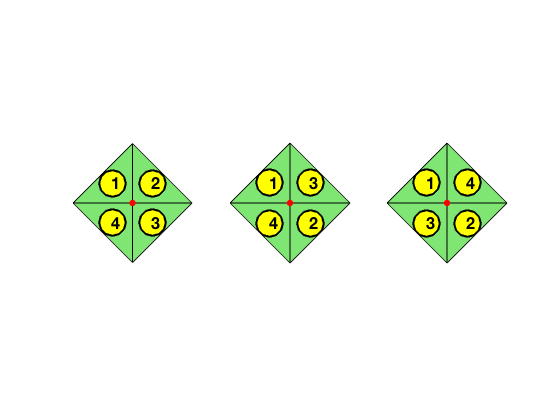

In [18]:
figure(1);
node1 = [1,0; 0,1; -1,0; 0,-1; 0,0];
elem1 = [5 3 2; 5 1 2; 5 4 1; 5 3 4];
subplot(1,3,1); showmesh(node1,elem1); findelem(node1,elem1);
findnode(node1,5,'noindex');
elem1 = [5 3 2; 5 4 1; 5 1 2; 5 3 4];
subplot(1,3,2); showmesh(node1,elem1); findelem(node1,elem1);
findnode(node1,5,'noindex');
elem1 = [5 3 2; 5 4 1; 5 3 4; 5 1 2];
subplot(1,3,3); showmesh(node1,elem1); findelem(node1,elem1);
findnode(node1,5,'noindex')

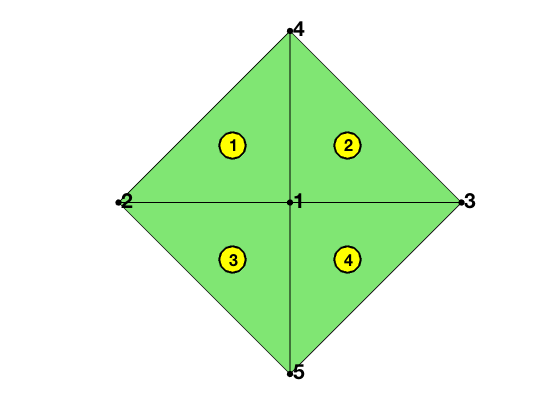

In [19]:
% We switch the local indices of nodal star to the first case. 
ix = (elem(nodeStar(1,:),3) == elem(nodeStar(4,:),2));
iy = (elem(nodeStar(2,:),2) == elem(nodeStar(3,:),3));
% nodeStar(:,ix & iy)  = nodeStar([1 2 3 4],ix & iy);
nodeStar(:,ix & ~iy) = nodeStar([1 3 2 4],ix & ~iy);
nodeStar(:,~ix & iy) = nodeStar([1 4 2 3],~ix & iy);
% nodeStar(:,~ix & ~iy)= nodeStar([1 4 3 2],~ix & ~iy);
%%
% We label the local indices of nodes in the star in the following figure.
figure(2)
node1 = [0,0; -1,0; 1,0; 0,1; 0,-1];
elem1 = [1 4 2; 1 3 4; 1 2 5; 1 5 3];
showmesh(node1,elem1); findelem(node1,elem1); findnode(node1);

Then t1 and t2 are merged to a big triangle and stored in t1 and
similarly t3 and t4 are merged together and stored in t3. Elements t2 and t4 will be removed later on.

In [20]:
t1 = nodeStar(1,:); 
t2 = nodeStar(2,:); 
t3 = nodeStar(3,:);
t4 = nodeStar(4,:);
% p1 = elem(t1,1); 
p2 = elem(t1,3); 
p3 = elem(t2,2); 
p4 = elem(t1,2); 
p5 = elem(t3,2);
elem(t1,:) = [p4 p2 p3]; 
elem(t2,1) = 0;
elem(t3,:) = [p5 p3 p2]; 
elem(t4,1) = 0;

For boundary good nodes, there is only one case.

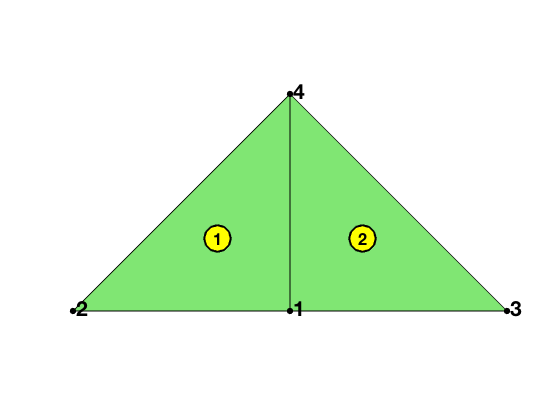

In [23]:
figure(2)
node1 = [0,0; -1,0; 1,0; 0,1];
elem1 = [1 4 2; 1 3 4];
showmesh(node1,elem1); findelem(node1,elem1); findnode(node1);
[ii,jj] = find(t2v(:,bdGoodNode));
nodeStar = reshape(ii,2,length(bdGoodNode));
t1 = nodeStar(1,:); 
t2 = nodeStar(2,:);
p1 = elem(t1,1); 
p2 = elem(t1,3); 
p3 = elem(t2,2); 
p4 = elem(t1,2);
elem(t1,:) = [p4 p2 p3]; 
elem(t2,1) = 0;

## Clean and Shift Node and Elem Matrices

The empty rows in node and elem matrices should be relased for the
efficent usage of meomory. 

In [25]:
elem((elem(:,1) == 0),:) = [];
isGoodNode = false(N,1);
isGoodNode(intGoodNode) = true;
isGoodNode(bdGoodNode) = true;
node(isGoodNode,:) = [];

Note that the indices of nodes in the coarsened mesh is changed while
elem still use the indices in the fine mesh. We build the indices map
between the fine grid to the coarse grid. For example, `indexMap(10) = 6`
means the 10-th node in the fine grid  is now the 6-th node in the coarse
one.

In [27]:
indexMap = zeros(N,1);
indexMap(~isGoodNode)= 1:size(node,1);
elem = indexMap(elem);

In the application to adaptive finite element methods, we will remove
 good-to-coraen nodes whose star are marked for coarsening. 

In the application to multigrid methods, we will record all neighboring
nodes in the nodal star of good nodes; see the functoin: `uniformcoarsen`.

The 3-D coarsening algorithm is slightly complicated than the 2-D case.

## Aditional data structure

- `bdFlag` stores information on boundary conditions. It is updated as

```bdFlag(t1,:) = [bdFlag(t1,2) bdFlag(t2,1) bdFlag(t1,1)];
bdFlag(t3,:) = [bdFlag(t3,2) bdFlag(t4,1) bdFlag(t3,1)];
bdFlag(t5,:) = [bdFlag(t5,2) bdFlag(t6,1) bdFlag(t5,1)];
bdFlag((elem(:,1) == 0),:) = [];```

- `tree(:,1:3)` stores the binary tree of the coarsening. `tree(:,1)` is the index of parent element in the coarsened mesh and `tree(:,2:3)` are two children indices in the original mesh.

```tree = zeros(NTdead,3,'uint32');
tree(1:NTdead,1) = [t1'; t3'; t5(idx)'];
tree(1:NTdead,2) = [t1'; t3'; t5(idx)'];
tree(1:NTdead,3) = [t2'; t4'; t6(idx)'];```